In [28]:
'''
This is just a trial and error trying to get sensor data stored by TTN.
Plotting temps and signal strength in the end.
Want to automate this!

- try bookeh plotting
- make github + binder, or sth nice for presentation
'''

'\nThis is just a trial and error trying to get sensor data stored by TTN.\nPlotting temps and signal strength in the end.\nWant to automate this!\n\n- try bookeh plotting\n- make github + binder, or sth nice for presentation\n'

In [29]:
import requests
import json
import pandas as pd
from icecream import ic
from matplotlib import pyplot as plt
import numpy as np

In [30]:
from datetime import datetime, timedelta, date
import matplotlib.dates as mdates
import matplotlib.units as munits
converter = mdates.ConciseDateConverter()
munits.registry[np.datetime64] = converter
munits.registry[date] = converter
munits.registry[datetime] = converter

In [34]:

# imports for bokeeh

from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource
output_notebook()

Loading BokehJS ...

In [70]:
# authorization key (bør gjemmes i environment)
# akey = 'ttn-account-v2.ByyotZipQRwxs-Ag0C-v-9vJt0ZqvbZUtxzHLOobu7s'
akey = 'NNSXS.YI4URLBWJM6LZ3STBVEIHKYG7QLU5NV5JOIZUTY.VH4QOO3FCLDOJHJV32DRYZUNI5ZF7DQWKCBJSFCDPNBHJDQBIL5A'
akey = 'NNSXS.AOGB6S3PX74H4DUOJZ4AYVCHCPFF5HJGVIOC76A.C4K7SJKY67K3J5XB7KETKCFVPQJQN4JXGEDX5OW5HXA6ICZTSS5A'

# appen som henrik har laget for sin sensor på sintef
app = 'lsn50-tiller-1'

# devicen her, LHT65, måler batterinivå, temp, fukt, og har en ekstern tempsensor
devices = ['t1001', 't1002', 't1003', 't1004']

In [71]:
# URL
url = f'https://eu1.cloud.thethings.network/api/v3/as/applications/{app}/packages/storage/'
url0 = f'https://eu1.cloud.thethings.network/api/v3/as/applications/{app}/devices/{devices[0]}/packages/storage/'

# headers
headers = {'Accept': 'text/event-stream', 'Authorization': f'Bearer {akey}'}


In [72]:
r = requests.get(url, headers=headers)
r

<Response [200]>

In [73]:
ic(r)
ic(r.encoding)
print(r.text)

ic| r: <Response [200]>
ic| r.encoding: 'ISO-8859-1'
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [74]:
a = r.text.splitlines()[0]
print(a)
a = json.loads(a)
data = json.dumps(a, indent=4, sort_keys=True)
print(data)

{"result":{"end_device_ids":{"device_id":"t1004","application_ids":{"application_id":"lsn50-tiller-1"},"dev_eui":"A84041C3E182E151","dev_addr":"260B0045"},"received_at":"2021-09-18T00:01:06.066223809Z","uplink_message":{"f_port":2,"f_cnt":669,"frm_payload":"DScAaQE9AP////8=","decoded_payload":{"ADC_CH0V":0.317,"BatV":3.367,"Digital_IStatus":"L","Door_status":"OPEN","EXTI_Trigger":"FALSE","Hum_SHT":6553.5,"TempC1":10.5,"TempC_SHT":-0.1,"Work_mode":"IIC"},"rx_metadata":[{"gateway_ids":{"gateway_id":"sintef-energi-gateway-001","eui":"2CF7F1102250000E"},"time":"2021-09-18T00:01:05.711472052Z","timestamp":13035595,"rssi":-107,"channel_rssi":-107,"snr":9,"location":{"latitude":63.4176845714237,"longitude":10.402320027351381,"source":"SOURCE_REGISTRY"}}],"settings":{"data_rate":{"lora":{"bandwidth":125000,"spreading_factor":7}},"data_rate_index":5,"coding_rate":"4/5","frequency":"868100000","timestamp":13035595,"time":"2021-09-18T00:01:05.711472052Z"},"received_at":"2021-09-18T00:01:05.814822

In [75]:
def parse_response(r):
    # get more sensible data
    out = [json.loads(line) for line in r.text.splitlines() if len(line)]
    out = [item for item in out if 'decoded_payload' in item['result']['uplink_message']]
    return out


In [76]:
p = parse_response(r)

In [77]:
print(p[0])
ic(p[0]['result']['end_device_ids']['device_id'])

ic| p[0]['result']['end_device_ids']['device_id']: 't1004'


{'result': {'end_device_ids': {'device_id': 't1004', 'application_ids': {'application_id': 'lsn50-tiller-1'}, 'dev_eui': 'A84041C3E182E151', 'dev_addr': '260B0045'}, 'received_at': '2021-09-18T00:01:06.066223809Z', 'uplink_message': {'f_port': 2, 'f_cnt': 669, 'frm_payload': 'DScAaQE9AP////8=', 'decoded_payload': {'ADC_CH0V': 0.317, 'BatV': 3.367, 'Digital_IStatus': 'L', 'Door_status': 'OPEN', 'EXTI_Trigger': 'FALSE', 'Hum_SHT': 6553.5, 'TempC1': 10.5, 'TempC_SHT': -0.1, 'Work_mode': 'IIC'}, 'rx_metadata': [{'gateway_ids': {'gateway_id': 'sintef-energi-gateway-001', 'eui': '2CF7F1102250000E'}, 'time': '2021-09-18T00:01:05.711472052Z', 'timestamp': 13035595, 'rssi': -107, 'channel_rssi': -107, 'snr': 9, 'location': {'latitude': 63.4176845714237, 'longitude': 10.402320027351381, 'source': 'SOURCE_REGISTRY'}}], 'settings': {'data_rate': {'lora': {'bandwidth': 125000, 'spreading_factor': 7}}, 'data_rate_index': 5, 'coding_rate': '4/5', 'frequency': '868100000', 'timestamp': 13035595, 'time

't1004'

In [78]:
def p2devID(p):
    # p = parse_response(r)
    return [item['result']['end_device_ids']['device_id'] for item in p]

def p2payload(p):
    # p = parse_response(r)
    return [item['result']['uplink_message']['decoded_payload'] for item in p]
    
def p2rssi(p, datano=0):
    # p = parse_response(r)
    return [item['result']['uplink_message']['rx_metadata'][datano]['rssi'] for item in p]
        
def p2time(p):
    # p = parse_response(r)
    return [pd.to_datetime(item['result']['received_at']) for item in p]
    

In [79]:
ic(p2devID(p)[0])
ic(len(p2devID(p)))
ic(p2payload(p)[0])
ic(len(p2payload(p)))
ic(p2rssi(p)[0])
ic(len(p2rssi(p)))
ic(p2time(p)[0])
ic(len(p2time(p)))

ic| p2devID(p)[0]: 't1004'
ic| len(p2devID(p)): 2594
ic| p2payload(p)[0]: {'ADC_CH0V': 0.317,
                      'BatV': 3.367,
                      'Digital_IStatus': 'L',
                      'Door_status': 'OPEN',
                      'EXTI_Trigger': 'FALSE',
                      'Hum_SHT': 6553.5,
                      'TempC1': 10.5,
                      'TempC_SHT': -0.1,
                      'Work_mode': 'IIC'}
ic| len(p2payload(p)): 2594
ic| p2rssi(p)[0]: -107
ic| len(p2rssi(p)): 2594
ic| p2time(p)[0]: Timestamp('2021-09-18 00:01:06.066223809+0000', tz='UTC')
ic| len(p2time(p)): 2594


2594

In [80]:
pl = p2payload(p)
df = pd.DataFrame({
    'devID': p2devID(p),
    'payload': pl,
    'TempC1': [i['TempC1'] for i in pl],
    'BatV': [i['BatV'] for i in pl],
    'rssi': p2rssi(p),
    'time': p2time(p),
})
df['time'] = pd.to_datetime(df['time'])
df = df.set_index('time')

In [81]:
df

,devID,payload,TempC1,BatV,rssi
time,,,,,
2021-09-18 00:01:06.066223809+00:00,t1004,"{'ADC_CH0V': 0.317, 'BatV': 3.367, 'Digital_IS...",10.5,3.367,-107
2021-09-18 00:04:15.806822441+00:00,t1003,"{'ADC_CH0V': 0.276, 'BatV': 3.368, 'Digital_IS...",10.3,3.368,-121
2021-09-18 00:04:56.782607196+00:00,t1002,"{'ADC_CH0V': 0.302, 'BatV': 3.361, 'Digital_IS...",10.2,3.361,-111
2021-09-18 00:06:05.994118929+00:00,t1004,"{'ADC_CH0V': 0.317, 'BatV': 3.367, 'Digital_IS...",10.5,3.367,-102
2021-09-18 00:09:15.908757687+00:00,t1003,"{'ADC_CH0V': 0.276, 'BatV': 3.368, 'Digital_IS...",10.2,3.368,-113
...,...,...,...,...,...
2021-09-20 07:39:18.695649977+00:00,t1003,"{'ADC_CH0V': 0.281, 'BatV': 3.355, 'Digital_IS...",9.3,3.355,-118
2021-09-20 07:40:01.951006189+00:00,t1001,"{'ADC_CH0V': 0.295, 'BatV': 3.352, 'Digital_IS...",9.5,3.352,-116
2021-09-20 07:40:04.045139823+00:00,t1002,"{'ADC_CH0V': 0.301, 'BatV': 3.35, 'Digital_ISt...",9.4,3.350,-109


Text(0, 0.5, 'Grader celsius')

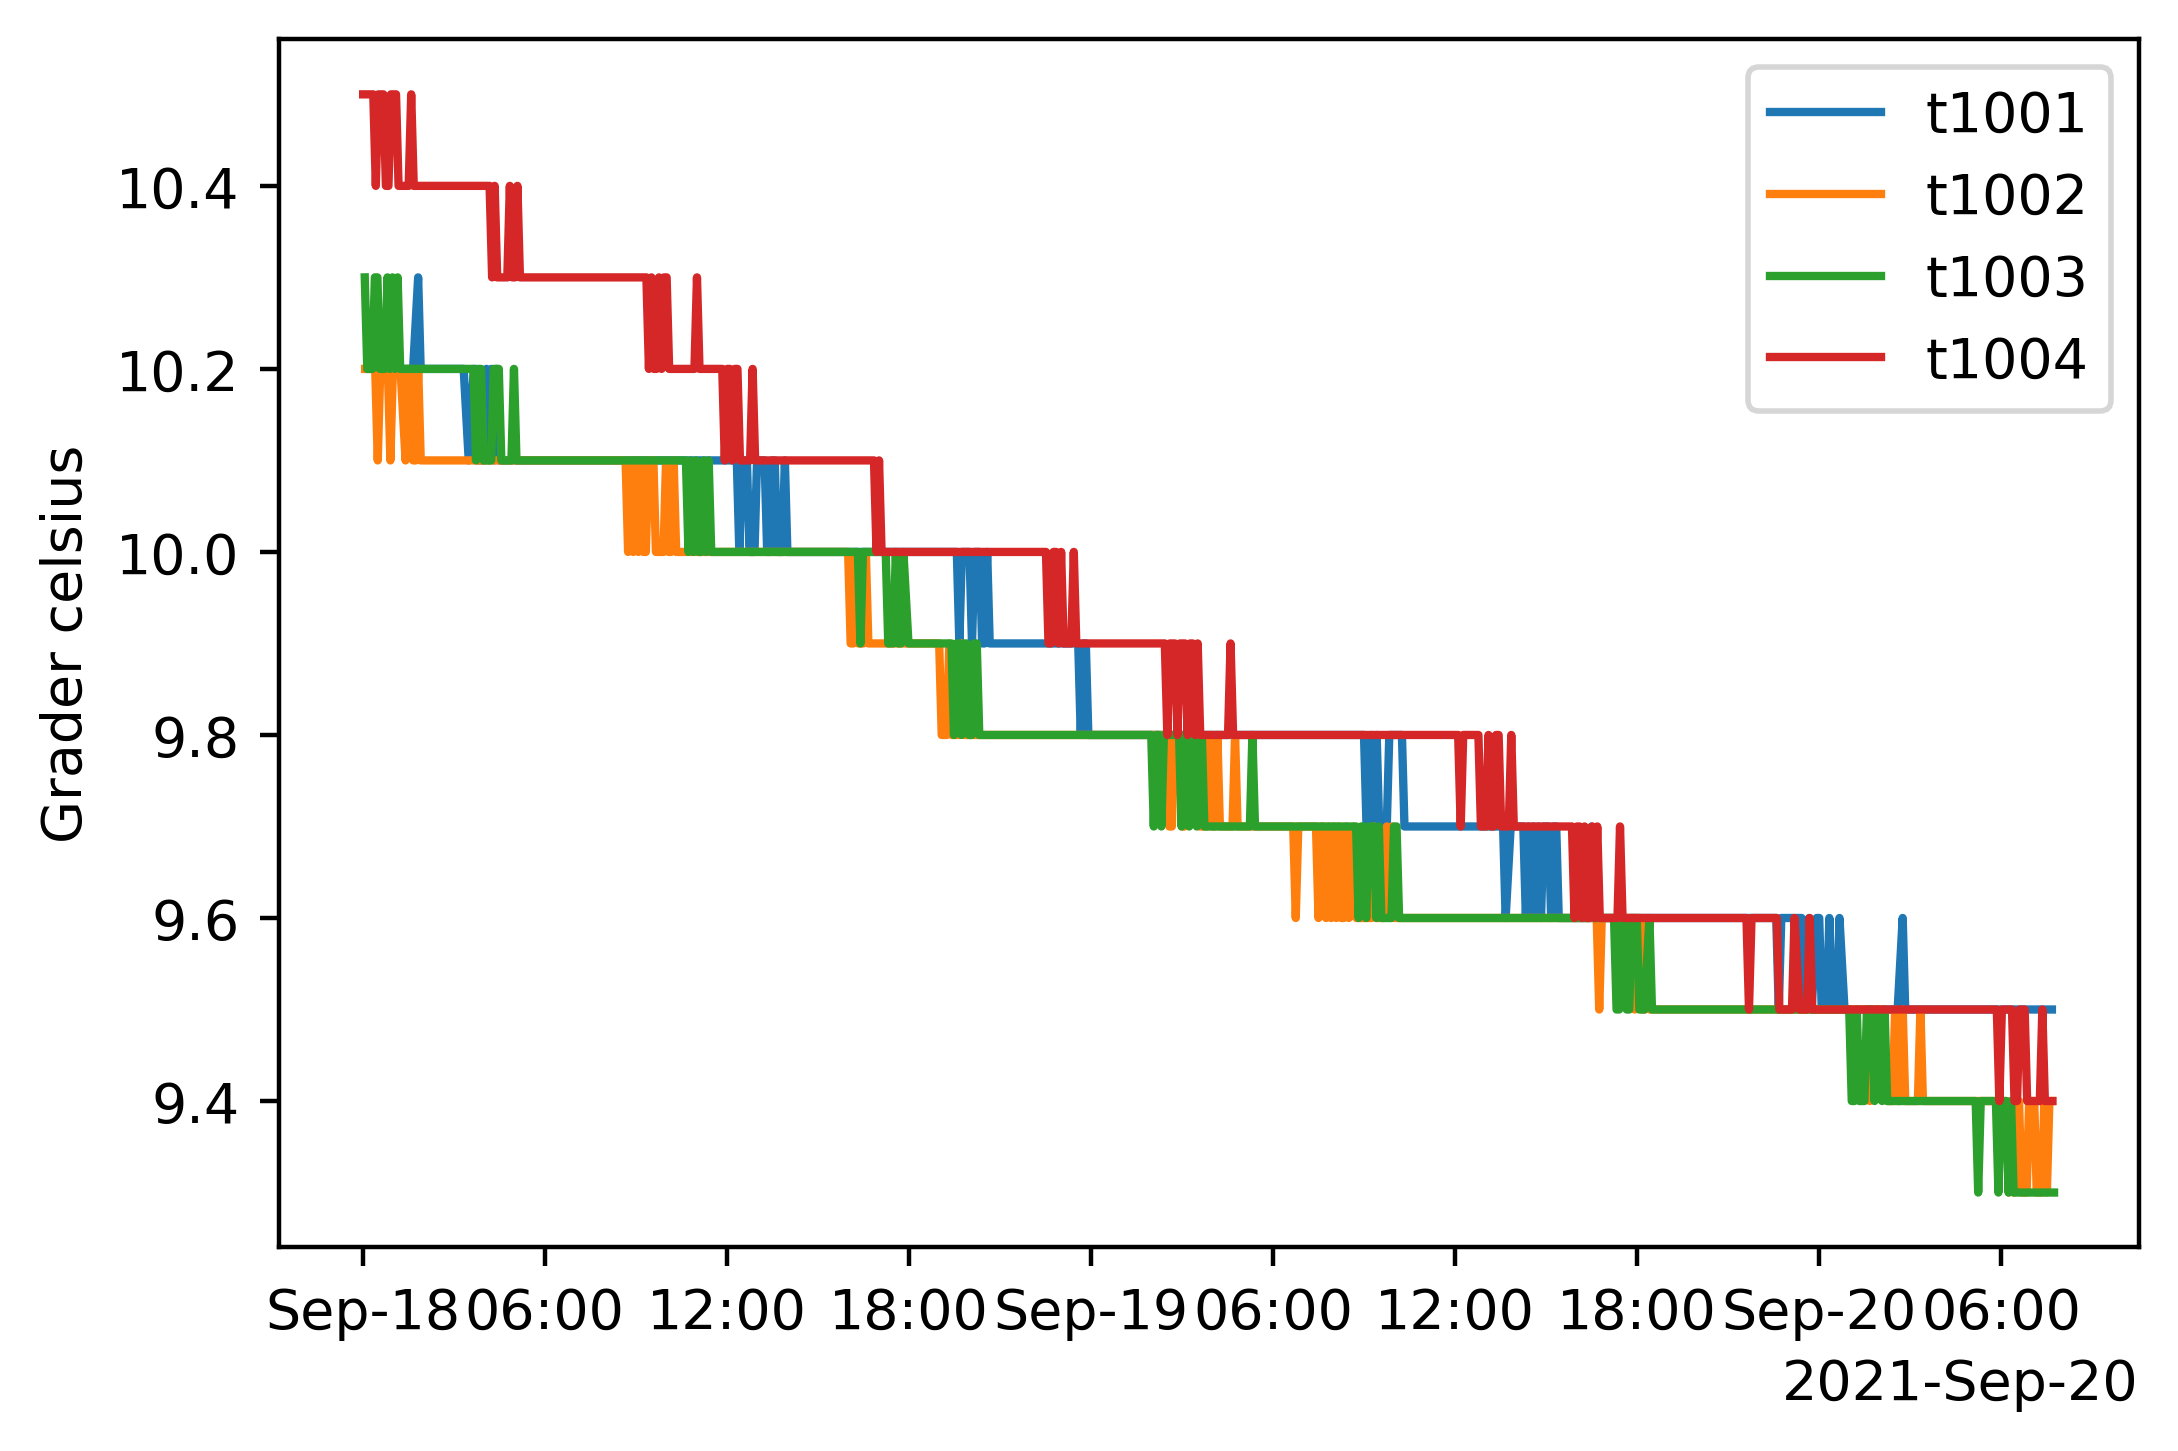

In [82]:
cutoff = pd.Timestamp("2021-09-16 14:00:00", tz="Europe/Brussels")
dfp = df.loc[df.index > cutoff]
plt.figure(dpi=400)
for devID in sorted(set(dfp['devID'])):
    plt.plot(dfp.loc[dfp['devID'] == devID]['TempC1'], label=devID)
plt.legend()
plt.ylabel('Grader celsius')


Text(0, 0.5, 'Signalstyrke')

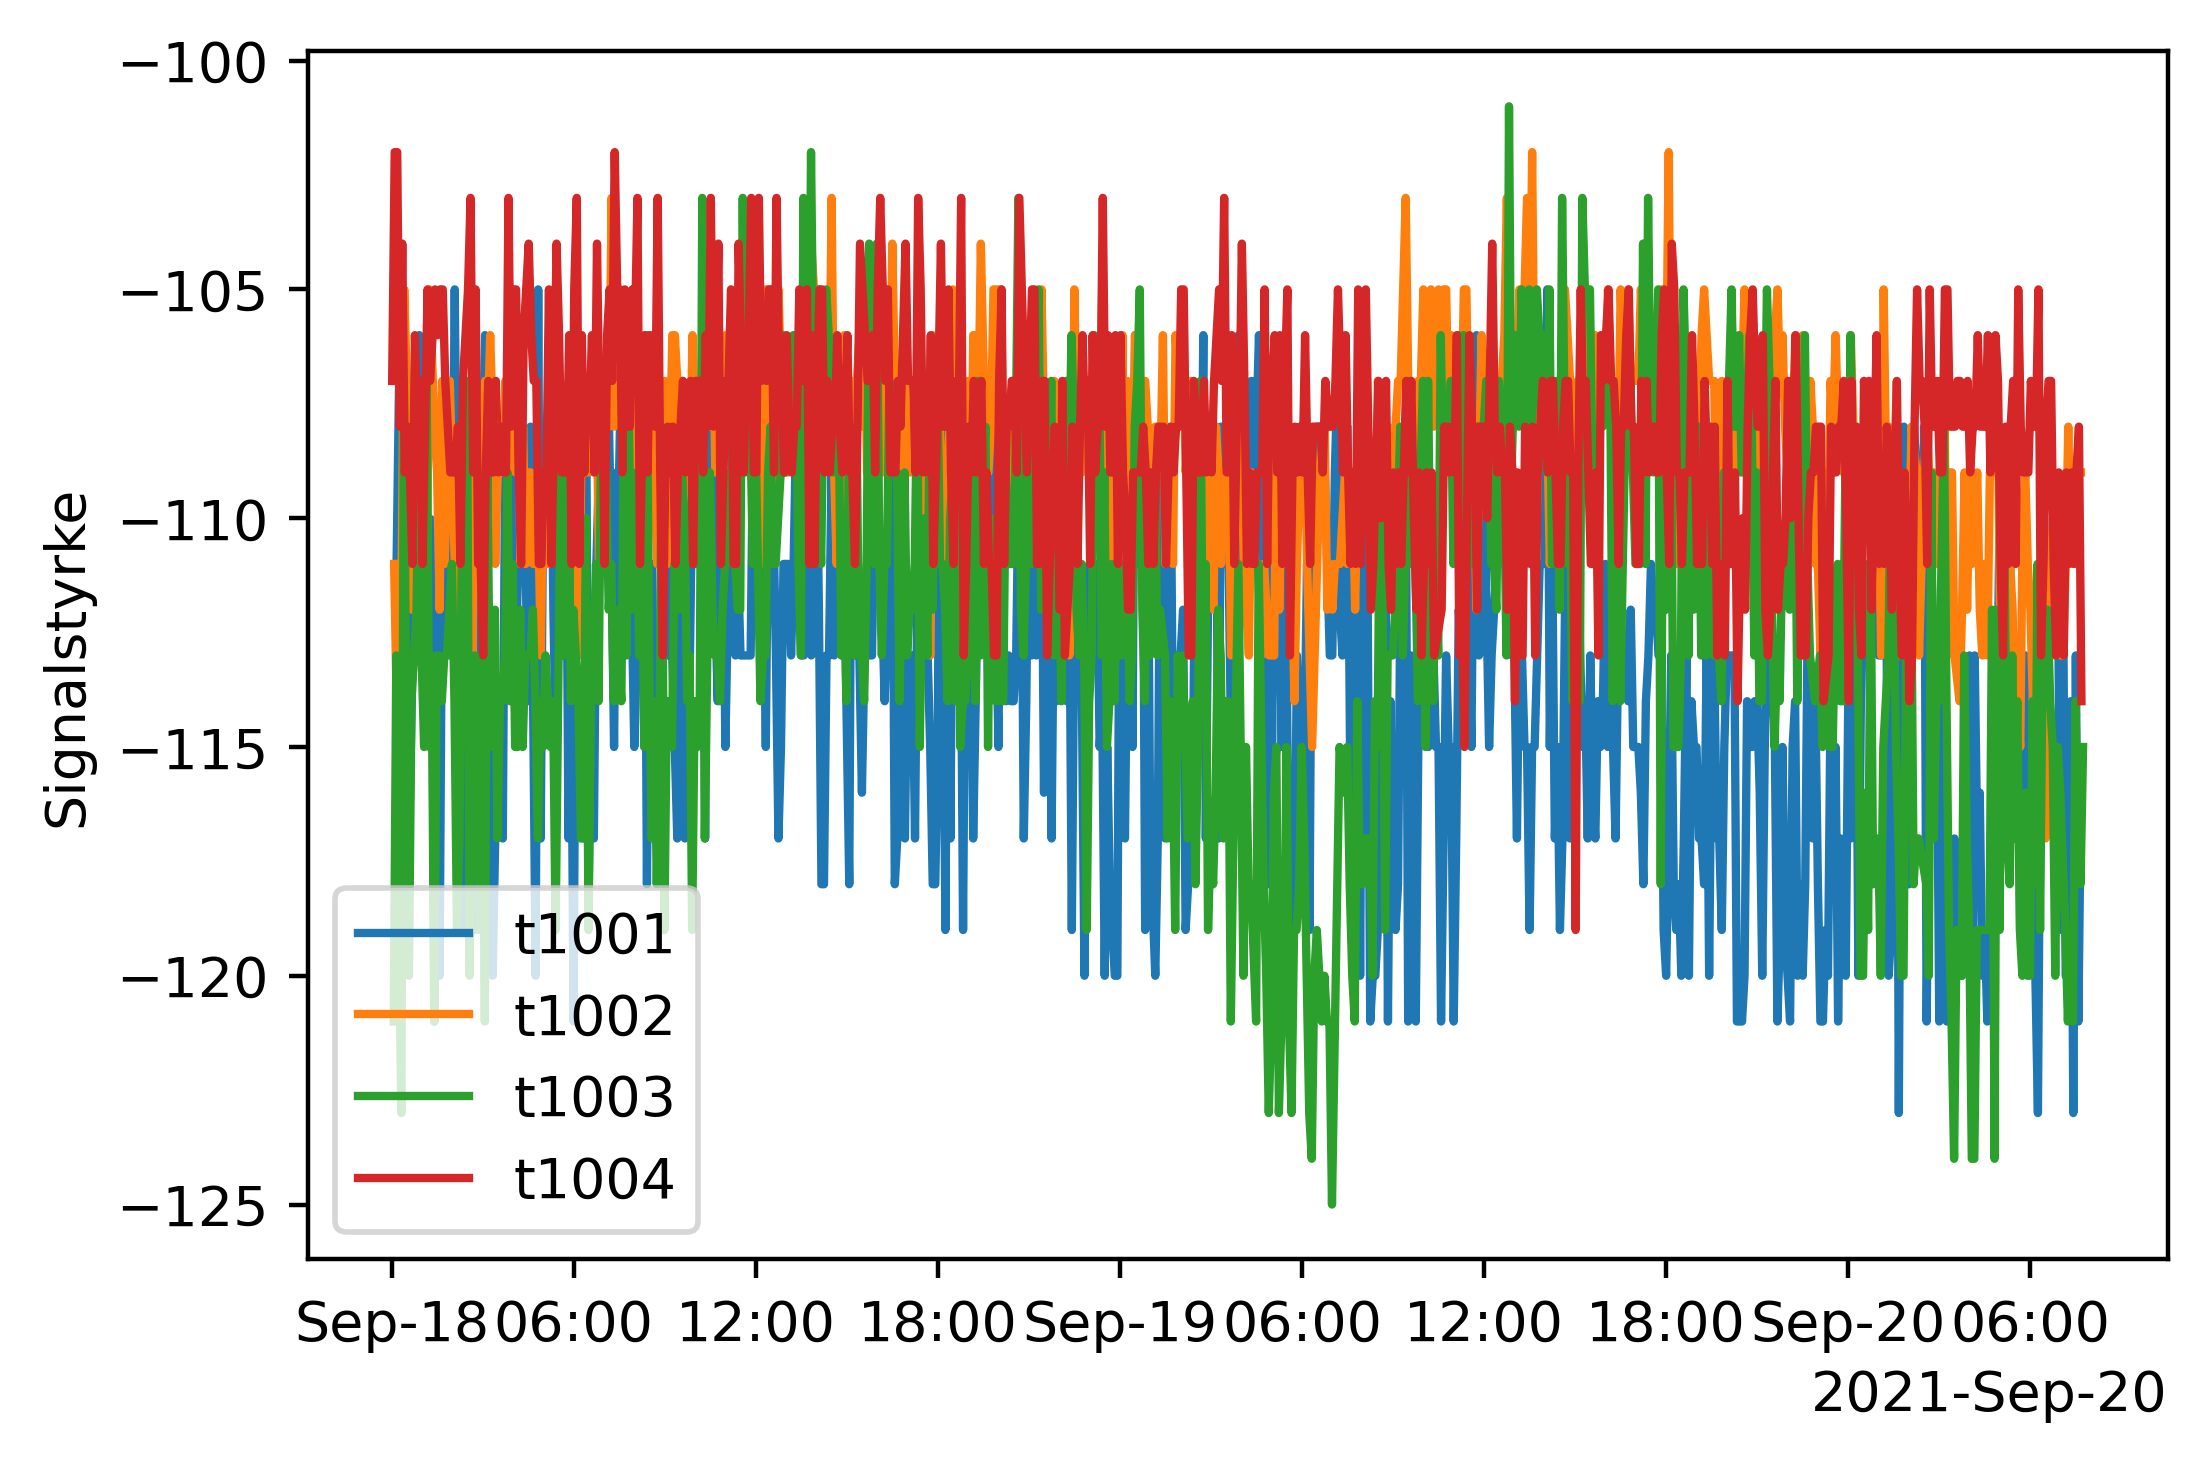

In [83]:
cutoff = pd.Timestamp("2021-09-16 14:00:00", tz="Europe/Brussels")
dfp = df.loc[df.index > cutoff]
plt.figure(dpi=400)
for devID in sorted(set(dfp['devID'])):
    plt.plot(dfp.loc[dfp['devID'] == devID]['rssi'], label=devID)
plt.legend()
plt.ylabel('Signalstyrke')

Text(0, 0.5, 'Batteristyrke')

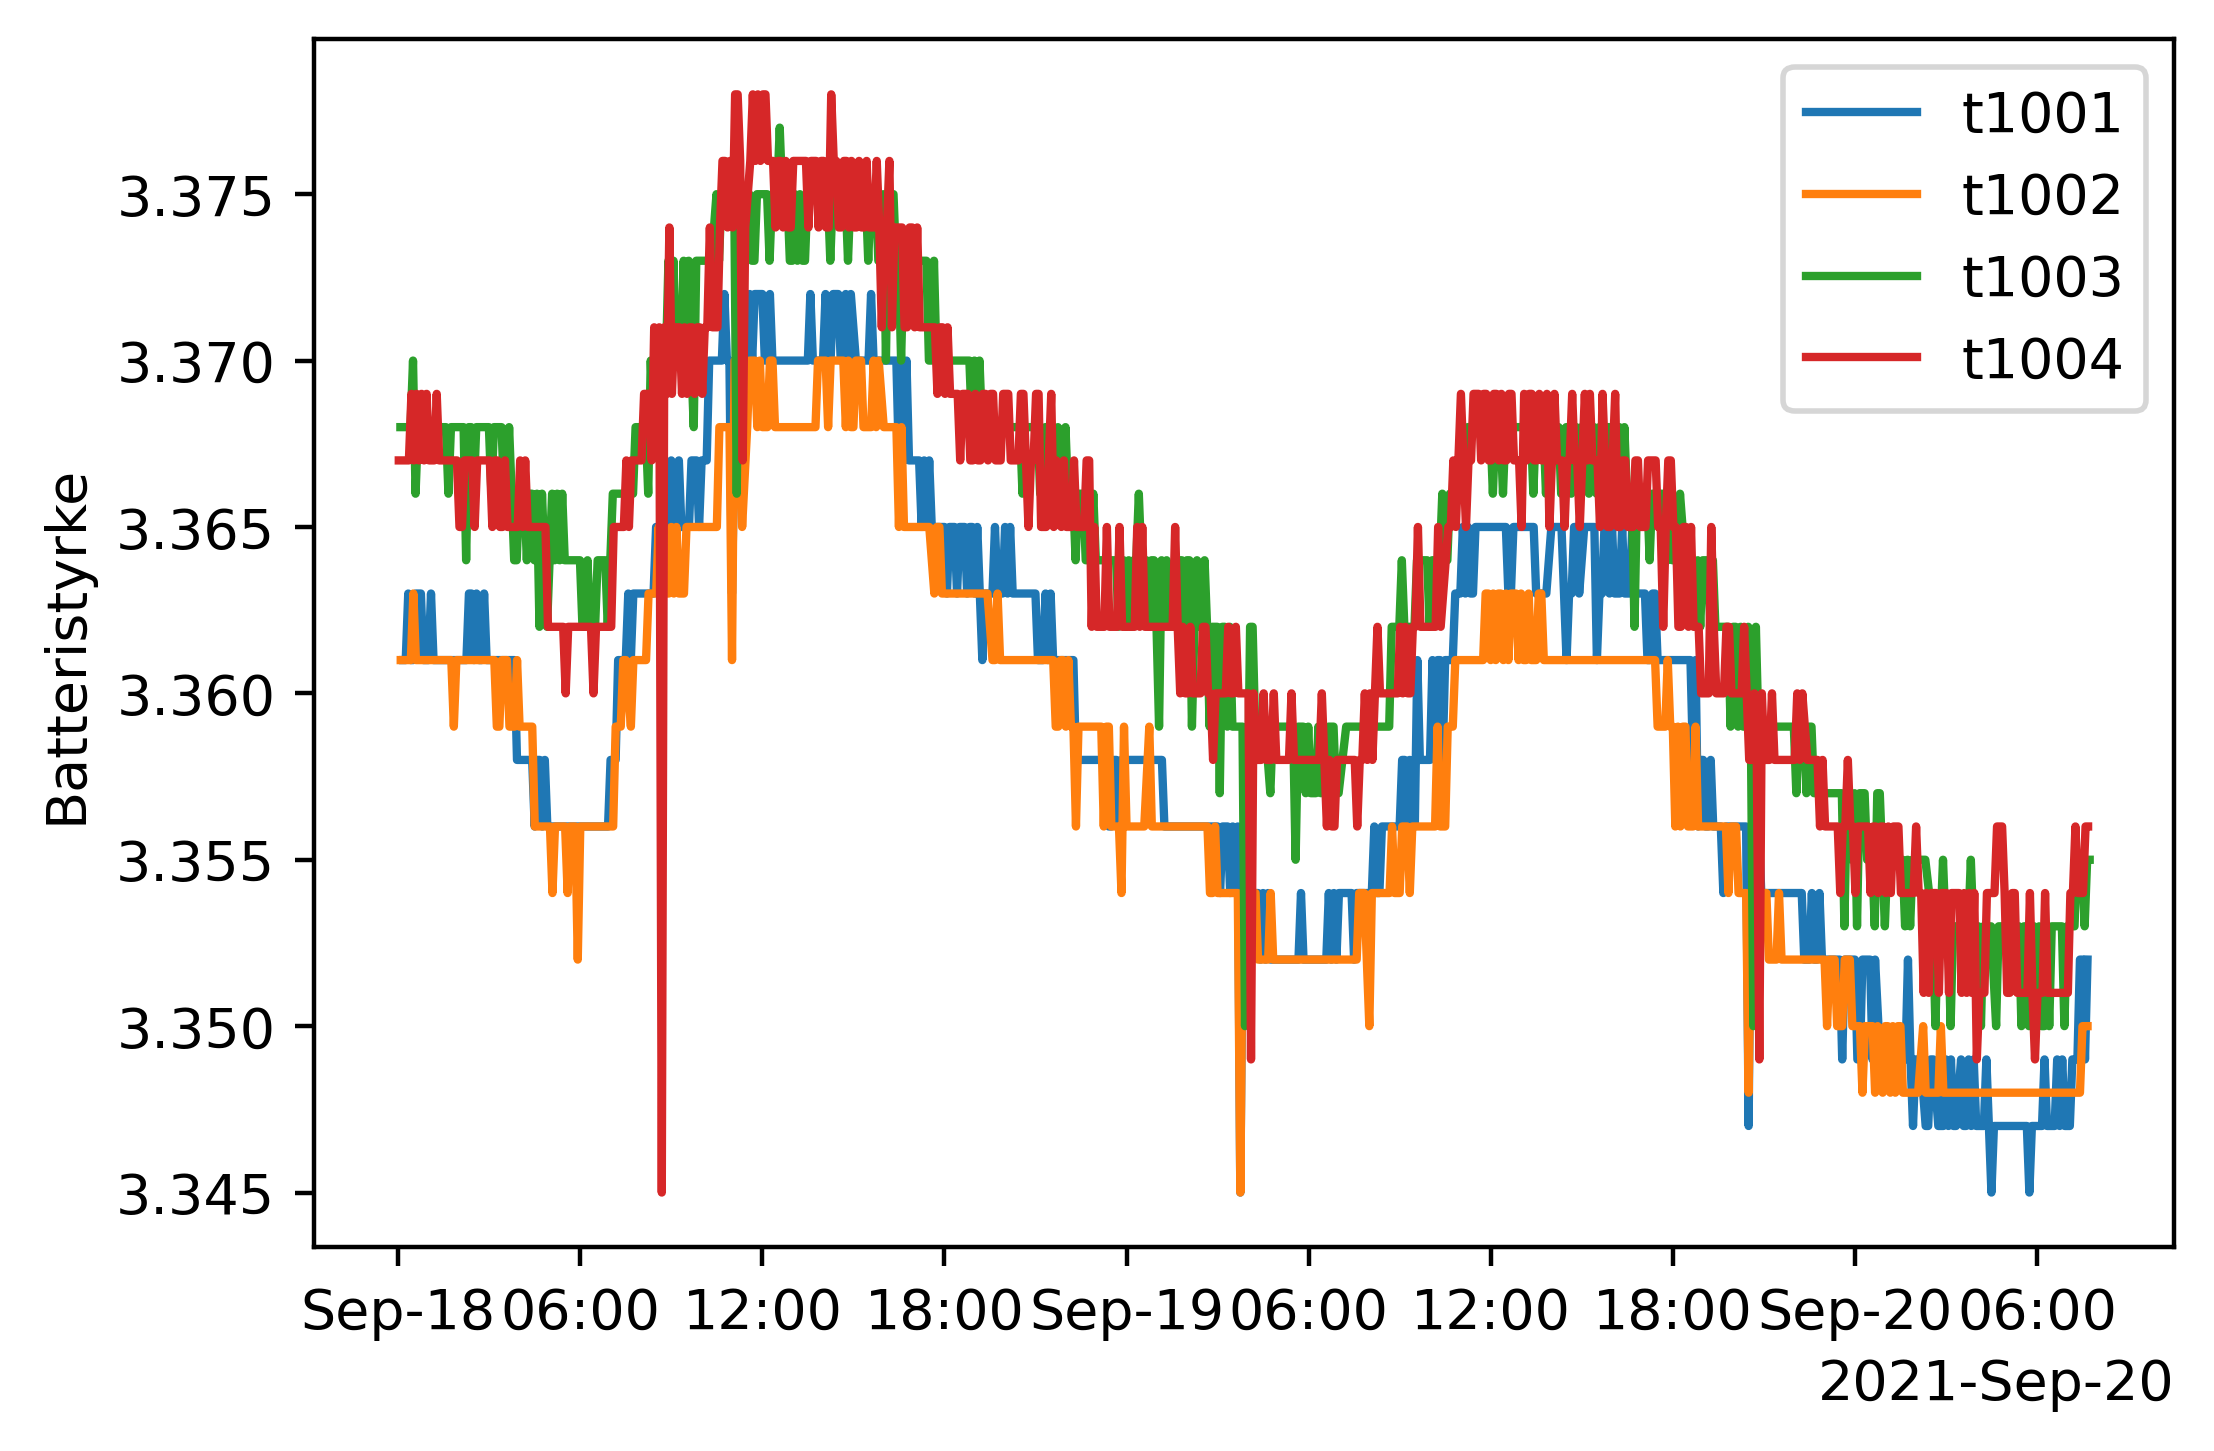

In [84]:
cutoff = pd.Timestamp("2021-09-16 14:00:00", tz="Europe/Brussels")
dfp = df[df.index > cutoff]
plt.figure(dpi=400)
for devID in sorted(set(dfp['devID'])):
    plt.plot(dfp[dfp['devID'] == devID]['BatV'], label=devID)
plt.legend()
plt.ylabel('Batteristyrke')

In [85]:
# create a new plot with default tools, using figure
p = figure(plot_width=400, plot_height=400)

# add a circle renderer with x and y coordinates, size, color, and alpha
p.circle([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], size=15, line_color="navy", fill_color="orange", fill_alpha=0.5)

show(p) # show the results

In [86]:
# create a new plot with default tools, using figure
p = figure(plot_width=400, plot_height=400)

cutoff = pd.Timestamp("2021-09-16 14:00:00", tz="Europe/Brussels")
dfc = df[df.index > cutoff]

for devID in sorted(set(dfc['devID'])):
    dfp = dfc[dfc['devID'] == devID]['TempC1']
    x = list(dfp.index)
    y = list(dfp)
    p.line(x=x, y=y, legend_label=str(devID))
    
p.title.text = 'Temperatur'
#plt.legend()
#plt.ylabel('Grader celsius')

show(p)

